In [1]:
import pandas as pd

# Q1
# a) Read the csv file (Housing.csv in Canvas) in Pandas Dataframe

url = url = 'https://github.com/lc0312/COSC502/blob/main/Housing.csv?raw=true'
house_df = pd.read_csv(url)
house_df.head(5)

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,13300000,7420,4,2,3,yes,no,no,no,yes,2,yes,furnished
1,12250000,8960,4,4,4,yes,no,no,no,yes,3,no,furnished
2,12250000,9960,3,2,2,yes,no,yes,no,no,2,yes,semi-furnished
3,12215000,7500,4,2,2,yes,no,yes,no,yes,3,yes,furnished
4,11410000,7420,4,1,2,yes,yes,yes,no,yes,2,no,furnished


In [2]:
# b) Store price as an dependent variable (Y) and area, bedrooms, bathrooms, stories, and furnishingstatus as independent variables (X)

Y_data = house_df['price']
X_data = house_df[['area','bedrooms','bathrooms','stories','furnishingstatus']]

X_dummies = pd.get_dummies (X_data.furnishingstatus) # create dummies for furnishingstatus

X_data = pd.concat ([X_data, X_dummies], axis='columns')  # add dummies to dataframe
X_data = X_data.drop(columns = 'furnishingstatus') # delete old furnishingstatus

print (X_data.head(5)) 


   area  bedrooms  bathrooms  stories  furnished  semi-furnished  unfurnished
0  7420         4          2        3          1               0            0
1  8960         4          4        4          1               0            0
2  9960         3          2        2          0               1            0
3  7500         4          2        2          1               0            0
4  7420         4          1        2          1               0            0


In [3]:
# c) Create a training (80%) and test set (20%) from the above dataset.
from sklearn.model_selection import train_test_split

X_train, X_test, Y_train, Y_test = train_test_split (X_data, Y_data, test_size=0.2)


In [4]:
# d) Use sklearn library to perform Regression in the training dataset.
from sklearn import linear_model

regres = linear_model.LinearRegression()
regres.fit (X_train, Y_train)

print ('Intercept:', regres.intercept_)
print ('Coefficients:', regres.coef_)

Intercept: -11622.32529573515
Coefficients: [ 3.48710329e+02  1.64909730e+05  1.20618739e+06  5.14769732e+05
  3.09757234e+05  1.23275508e+05 -4.33032742e+05]


In [5]:
# e) Predict the price of a house with following: area = 4850 square feet, bedrooms = 3 bathrooms =3, stories =2 and semi-furnished.

print ('Price is:', regres.predict([[4850,3,3,2,0,1,0]])) # use those number for X test

Price is: [6945729.10807393]


c:\Users\ozturklab\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


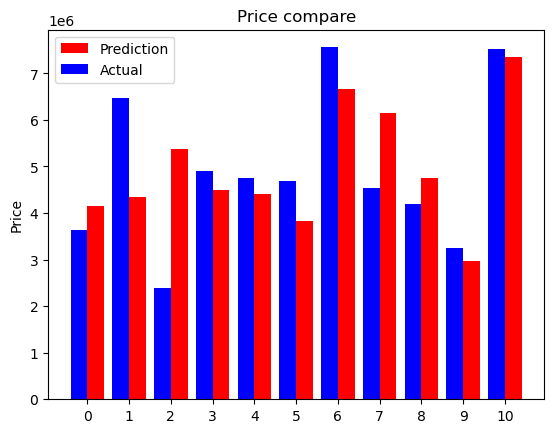

In [6]:
# f) Predict the prices of all the houses in the test set and compare the predicted values and actual values (you may generate a side-by-side graph for first 10 test samples)
import matplotlib.pyplot as plt
import numpy as np

Y_predict = regres.predict (X_test)
x_plot = np.arange(11)

plt.bar (x_plot+0.2, Y_predict[0:11], 0.4, label='Prediction', color='red')
plt.bar (x_plot-0.2, Y_test[0:11], 0.4, label='Actual', color='blue')

plt.title ('Price compare')
plt.ylabel ('Price')
plt.xticks(x_plot,x_plot)
plt.legend()
plt.show()


In [7]:
# g) While testing, calculate the Squared error, Mean squared error, and Root mean squared error 
from sklearn import metrics

MSE = metrics.mean_squared_error (Y_predict, Y_test)
RMSE = metrics.mean_squared_error (Y_predict, Y_test, squared=False)
SE = MSE * (Y_test.shape[0])

print ('Mean squared error:', MSE)
print ('Root mean squared error:', RMSE)
print ('Squared error:', SE) # becasue thre is no function to get seuqred error, so use n*MSE to get SE, same value.


Mean squared error: 1605455902195.49
Root mean squared error: 1267065.8634007508
Squared error: 174994693339308.4


In [8]:
# Q2
# a) Read the csv file (Bank.csv in Canvas) and provide summary of the DataFrame byprinting the object

url = 'https://github.com/lc0312/COSC502/blob/main/Bank.csv?raw=true'
bank_df = pd.read_csv(url)
print (bank_df)

        ID  Age  Experience  Income  ZIP Code  Family  CCAvg  Education  \
0        1   25           1      49     91107       4    1.6          1   
1        2   45          19      34     90089       3    1.5          1   
2        3   39          15      11     94720       1    1.0          1   
3        4   35           9     100     94112       1    2.7          2   
4        5   35           8      45     91330       4    1.0          2   
...    ...  ...         ...     ...       ...     ...    ...        ...   
4995  4996   29           3      40     92697       1    1.9          3   
4996  4997   30           4      15     92037       4    0.4          1   
4997  4998   63          39      24     93023       2    0.3          3   
4998  4999   65          40      49     90034       3    0.5          2   
4999  5000   28           4      83     92612       3    0.8          1   

      Mortgage  Personal Loan  Securities Account  CD Account  Online  \
0            0            

In [9]:
# b) Consider the ‘Personal Loan’ as class (Y) variable and Age, Experience, Income, and Education as independent (X) variable.

Y_data = bank_df['Personal Loan']
X_data = bank_df[['Age','Experience','Income','Education']]

In [10]:
# c) Create a training (80%) and test set (20%) from the dataset.

X_train, X_test, Y_train, Y_test = train_test_split (X_data.values, Y_data.values, test_size=0.2)

In [11]:
# d) Use Logistic Regression model in the training dataset and Evaluate in the test set

logi_reg = linear_model.LogisticRegression ()
logi_reg.fit (X_train, Y_train)

Y_predict = logi_reg.predict (X_test)

print ('First 10 in prediction:', Y_predict[0:11])
print ('First 10 in real:', Y_test[0:11])

First 10 in prediction: [0 0 0 0 0 0 1 0 0 1 0]
First 10 in real: [0 0 0 0 0 0 1 0 0 1 0]


In [12]:
# e) Show your test result as Accuracy, F1 score and Confusion matrix.
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix

print ('Accuracy and F1 score: \n', classification_report (Y_predict, Y_test))

print ('Confuison matrix: \n', confusion_matrix (Y_predict, Y_test))


Accuracy and F1 score: 
               precision    recall  f1-score   support

           0       0.99      0.96      0.97       945
           1       0.53      0.82      0.64        55

    accuracy                           0.95      1000
   macro avg       0.76      0.89      0.81      1000
weighted avg       0.96      0.95      0.95      1000

Confuison matrix: 
 [[905  40]
 [ 10  45]]


In [17]:
X_new = [[27,3,85,2],[30,6,110,2],[50,0,100,3],[35, 12,150,1],[55,25,220,3]]

Y_new = logi_reg.predict (X_new)

print ('Result:', Y_new)
print ('only last person can get loan')

Result: [0 0 0 0 1]
only last person can get loan
